   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

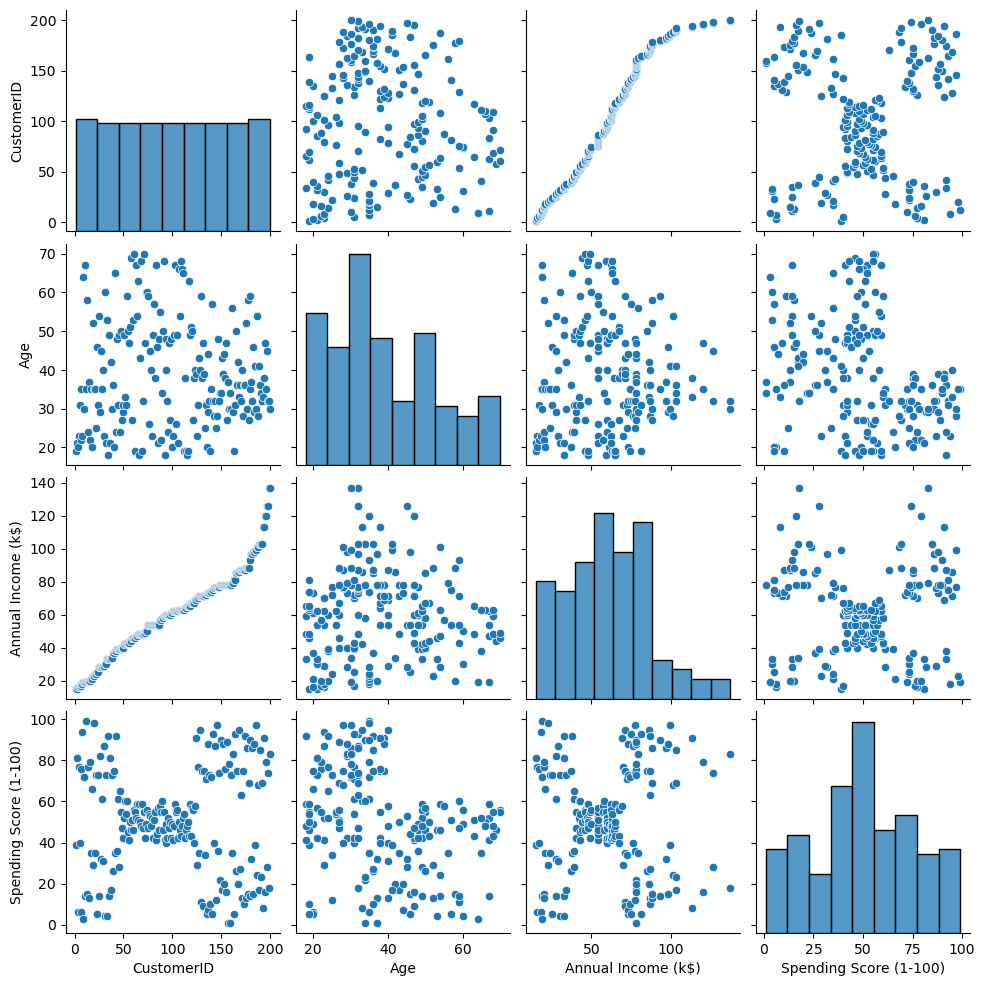

In [7]:
# Step 1: Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Print the first few rows of the DataFrame
print(df.head())

# Get an overview of the dataset
print(df.info())

# Statistical summaries of numerical columns
print(df.describe())

# Visualize the distributions and correlations
sns.pairplot(df)
plt.show()


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39            1
1           2   21                  15                      81            1
2           3   20                  16                       6            0
3           4   23                  16                      77            0
4           5   31                  17                      40            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Male             200 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB
None
       CustomerID         Age 

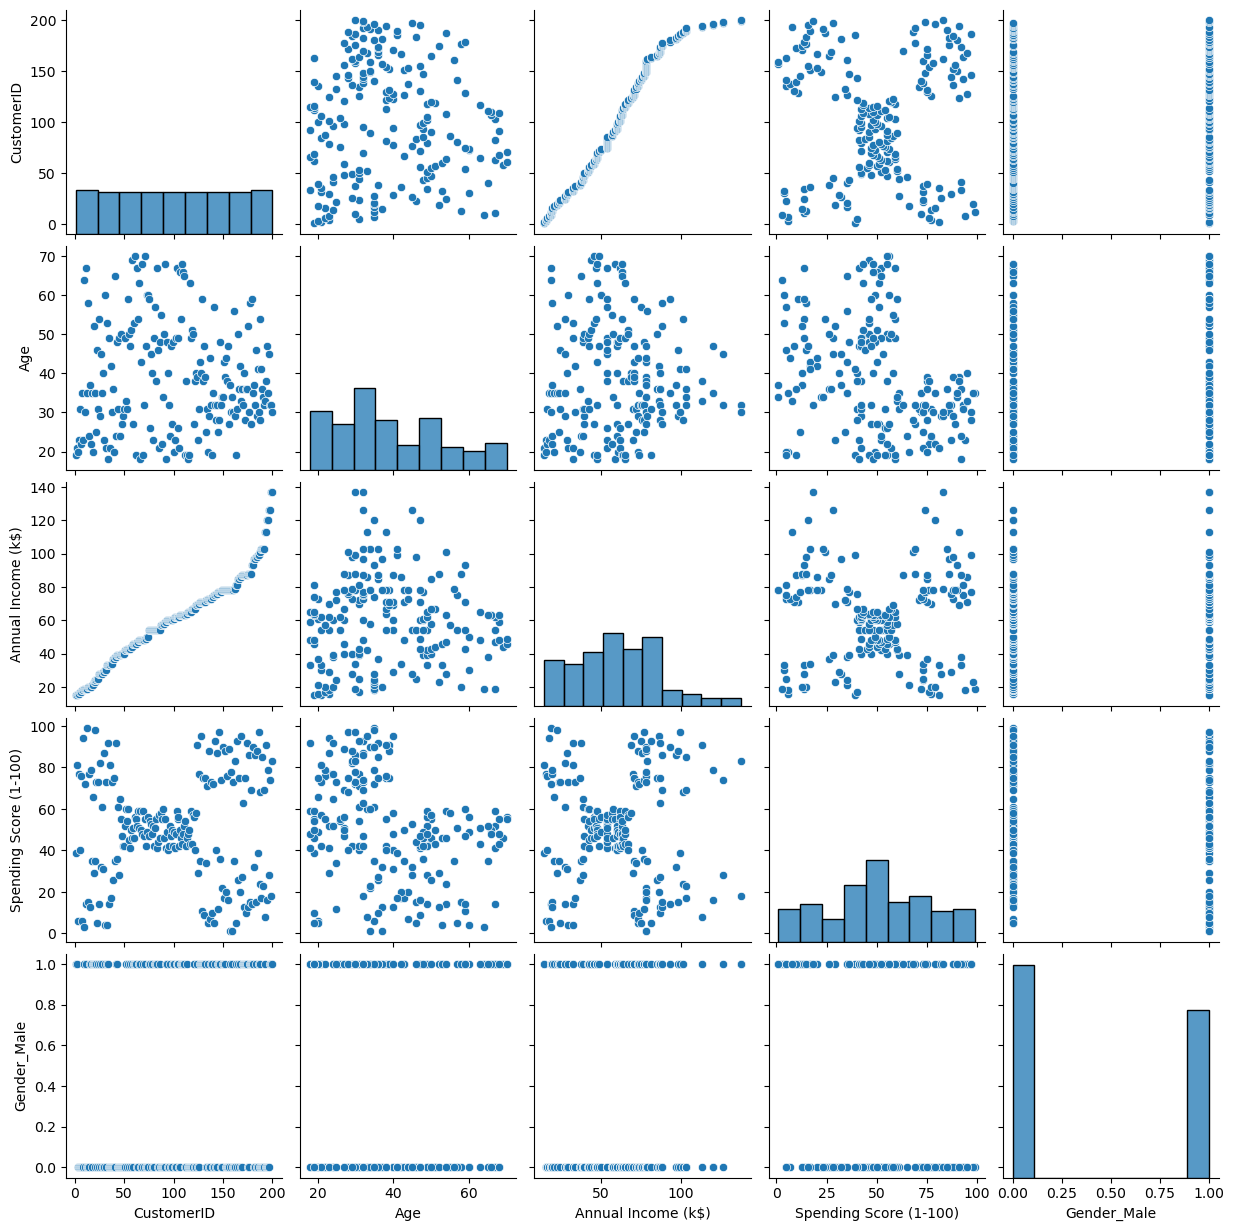

In [8]:
# Step 2: Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Perform one-hot encoding on the 'Gender' column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Print the first few rows of the preprocessed DataFrame
print(df.head())

# Get an overview of the dataset
print(df.info())

# Statistical summaries of numerical columns
print(df.describe())

# Visualize the distributions and correlations
sns.pairplot(df)
plt.show()


In [10]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the preprocessed dataset
df = pd.read_csv('Mall_Customers.csv')

# Perform one-hot encoding on the 'Gender' column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Select the relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Define the number of clusters
num_clusters = 5

# Create a KMeans object and fit it to the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Calculate the average values for each cluster
cluster_avg = df.groupby('Cluster').mean()

# Print the average values
print(cluster_avg)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         23.000000  45.217391           26.304348               20.913043   
1        162.000000  32.692308           86.538462               82.128205   
2        162.945946  40.324324           87.432432               18.189189   
3         85.012658  43.126582           54.822785               49.835443   
4         23.090909  25.272727           25.727273               79.363636   

         Gender_Male  
Cluster               
0           0.391304  
1           0.461538  
2           0.513514  
3           0.417722  
4           0.409091  


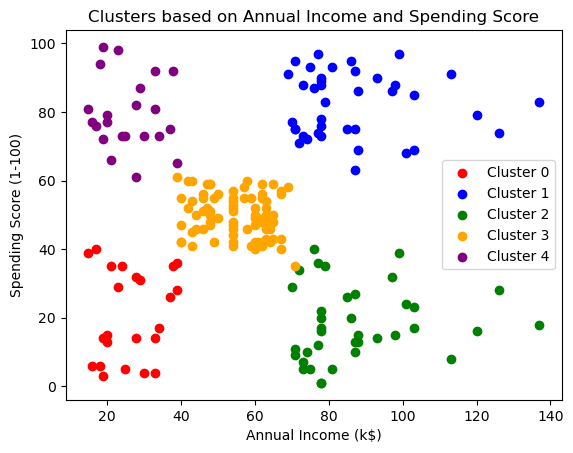

In [12]:
plt.scatter(df[df['Cluster'] == 0]['Annual Income (k$)'], df[df['Cluster'] == 0]['Spending Score (1-100)'], color='red', label='Cluster 0')
plt.scatter(df[df['Cluster'] == 1]['Annual Income (k$)'], df[df['Cluster'] == 1]['Spending Score (1-100)'], color='blue', label='Cluster 1')
plt.scatter(df[df['Cluster'] == 2]['Annual Income (k$)'], df[df['Cluster'] == 2]['Spending Score (1-100)'], color='green', label='Cluster 2')
plt.scatter(df[df['Cluster'] == 3]['Annual Income (k$)'], df[df['Cluster'] == 3]['Spending Score (1-100)'], color='orange', label='Cluster 3')
plt.scatter(df[df['Cluster'] == 4]['Annual Income (k$)'], df[df['Cluster'] == 4]['Spending Score (1-100)'], color='purple', label='Cluster 4')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Annual Income and Spending Score')
plt.legend()
plt.show()


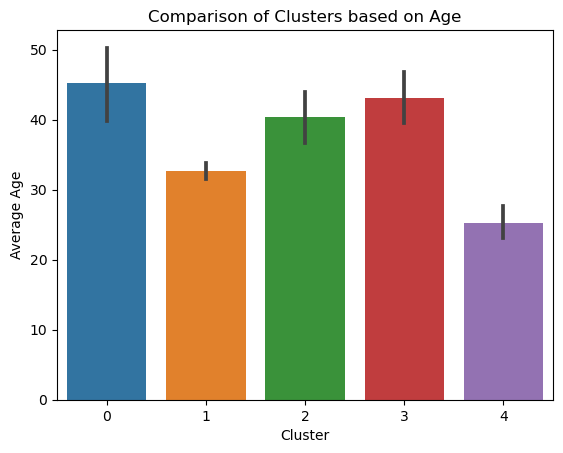

In [13]:
sns.barplot(x='Cluster', y='Age', data=df)
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.title('Comparison of Clusters based on Age')
plt.show()


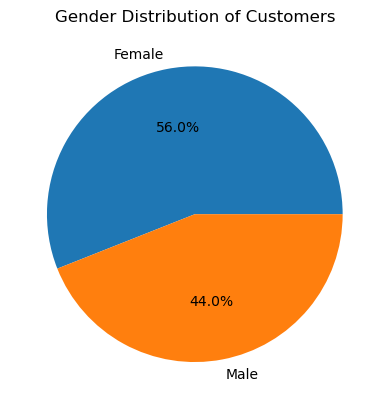

In [22]:
# Count the number of customers by gender
gender_counts = df['Gender'].value_counts()

# Plot a pie chart of gender distribution
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()


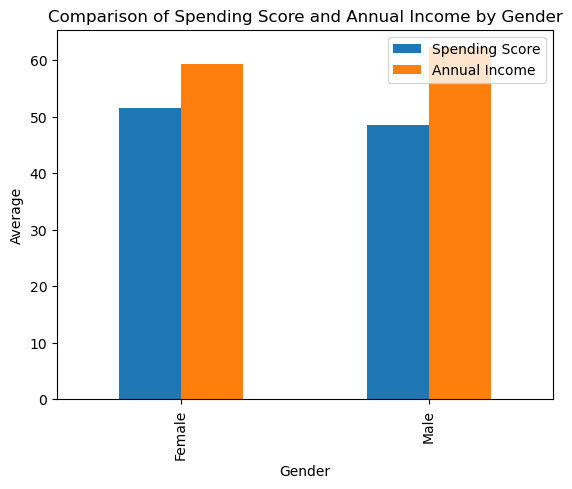

In [20]:
# Calculate the average spending score and annual income by gender
gender_avg = df.groupby('Gender').mean()[['Spending Score (1-100)', 'Annual Income (k$)']]

# Plot a grouped bar chart
gender_avg.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average')
plt.title('Comparison of Spending Score and Annual Income by Gender')
plt.legend(['Spending Score', 'Annual Income'])
plt.show()


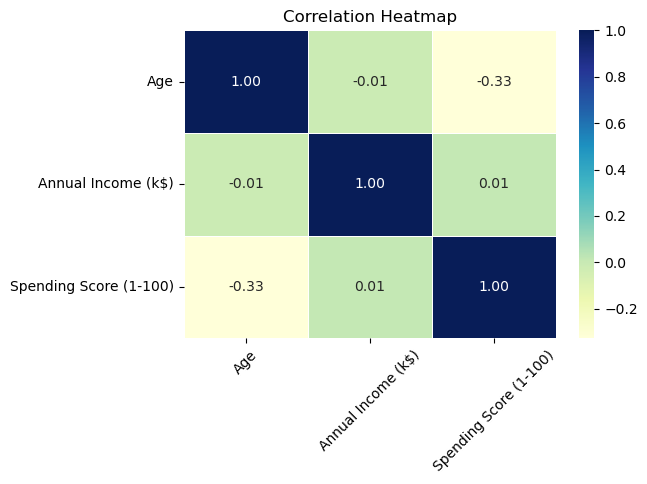

In [25]:
# Select the variables for correlation analysis
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Compute the correlation matrix
correlation_matrix = df[variables].corr()

# Create a correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
